In [22]:
## Parte 1
# Primero que nada, realizamos la limpieza de la base de datos.
import numpy as np
import pandas as pd

df_04 = pd.read_stata('C:\\Users\\54115\\Desktop\\Python\\TP2\\usu_individual_T104.dta')
df_24 = pd.read_excel('C:\\Users\\54115\\Desktop\\Python\\TP2\\usu_individual_T124.xlsx', engine='openpyxl')
df_24 = df_24[df_24['REGION'] == 1]
df_24["REGION"]="Gran Buenos Aires"
df_04=df_04.replace(0.0, np.nan)
df_04=df_04.replace(0.0, np.nan)

KeyboardInterrupt: 

In [26]:
df_04 = df_04.rename(columns={'deccfr': 'DECCFR'})
df_04 = df_04.rename(columns={'ideccfr': 'IDECCFR'})
df_04 = df_04.rename(columns={'gdeccfr': 'GDECCFR'})
df_04 = df_04.rename(columns={'rdeccfr': 'RDECCFR'})
df_04 = df_04.rename(columns={'pdeccfr': 'PDECCFR'})
df_04 = df_04.rename(columns={'adeccfr': 'ADECCFR'})

# Identificamos distintas variables con problemas de codificación, y son las siguientes:
variables_con_problemas = ['DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR']
for var in variables_con_problemas:
    # Revisamos los valores únicos en 2004
    val_04 = set(df_04[var].dropna().unique())
    # Revisamos los valores únicos en 2024
    val_24 = set(df_24[var].dropna().unique())
    
    print(f"Valores únicos para la variable '{var}':")
    print(f"  - 2004: {val_04}")
    print(f"  - 2024: {val_24}")
    print("-" * 40)

Valores únicos para la variable 'DECCFR':
  - 2004: {'10', '08', '07', '01', '00', '06', '05', '03', '09', '02', '04'}
  - 2024: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}
----------------------------------------
Valores únicos para la variable 'IDECCFR':
  - 2004: {'  ', '10', '08', '07', '01', '06', '05', '00', '03', '09', '02', '04'}
  - 2024: set()
----------------------------------------
Valores únicos para la variable 'RDECCFR':
  - 2004: {'10', '08', '07', '01', '06', '00', '05', '03', '09', '02', '04'}
  - 2024: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}
----------------------------------------
Valores únicos para la variable 'GDECCFR':
  - 2004: {'10', '  ', '08', '07', '01', '06', '00', '05', '03', '09', '02', '04'}
  - 2024: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0}
----------------------------------------
Valores únicos para la variable 'PDECCFR':
  - 2004: {'  ', '10', '08', '07', '01', '06', '05', '00', '03', '09', '02', '04'}
  - 2024: set()
----------------

In [27]:
## Vemos que hay diferencias de codificación entre las variables.
# El paso siguiente es realizar la homogeinización de aquellas variables de la lista, para poder realizar la limpieza.
# Homogeneizamos las dataframes dando los mismos nombres a las variables     


import numpy as np
def homogeneizar_variable(df, var):
    df[var] = df[var].replace(' ', np.nan)
    df[var] = pd.to_numeric(df[var], errors='coerce')

# Homogeneizamos cada variable
variables_con_problemas = ['DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR']

for var in variables_con_problemas:
    homogeneizar_variable(df_04, var)
    df_24[var] = pd.to_numeric(df_24[var], errors='coerce')

# Verificamos los resultados
for var in variables_con_problemas:
    print(f"Valores homogéneos para la variable '{var}':")
    print(f"  - 2004: {set(df_04[var].dropna().unique())}")
    print(f"  - 2024: {set(df_24[var].dropna().unique())}")
    print("-" * 40)



Valores homogéneos para la variable 'DECCFR':
  - 2004: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
  - 2024: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}
----------------------------------------
Valores homogéneos para la variable 'IDECCFR':
  - 2004: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}
  - 2024: set()
----------------------------------------
Valores homogéneos para la variable 'RDECCFR':
  - 2004: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
  - 2024: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}
----------------------------------------
Valores homogéneos para la variable 'GDECCFR':
  - 2004: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}
  - 2024: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0}
----------------------------------------
Valores homogéneos para la variable 'PDECCFR':
  - 2004: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}
  - 2024: set()
----------------------------------------
Valores homogéneos para la variable 'ADECCFR':
  - 2004: {0, 1, 2, 

In [28]:
#Cambio de nombre de las variables de interés:
df_24 = df_24.rename(columns={'CH04':'Sexos Relevados'})
df_24 = df_24.rename(columns={'NIVEL_ED':'Nivel Educativo'})
df_24 = df_24.rename(columns={'CH08': 'Cobertura Médica'})
df_24 = df_24.rename(columns={'CH07': 'Estado Civil'})
df_24 = df_24.rename(columns={'CAT_INAC': 'Categoría de Inactividad'})
df_24 = df_24.rename(columns={'IPCF': "Ingreso Per Cápita Familiar"})
df_24 = df_24.rename(columns={'CH06': "Años al momento de la encuesta"})
df_24 = df_24.rename(columns={'CH09': "Sabe leer y escribir"})
df_24 = df_24.rename(columns={'PP07G1': "Tiene Vacaciones Pagas"})
df_24 = df_24.rename(columns={'PP07G2': "Cobra Aguinaldo"})
df_24 = df_24.rename(columns={'PP07G_59': "Sin Aguinaldo Ni V.P"})
df_24 = df_24.rename(columns={'PP10D':"Trabajó en el último año"})

In [30]:
#Homogeneización de variables utilizadas en el TP 2
#Con ellas se agrega información a la base de datos final
df_04 = pd.read_stata('C:\\Users\\54115\\Desktop\\Python\\TP2\\usu_individual_T104.dta')
df_24 = pd.read_excel('C:\\Users\\54115\\Desktop\\Python\\TP2\\usu_individual_T124.xlsx', engine='openpyxl')
df_24 =df_24[df_24['REGION'] == 1]
df_24["REGION"]="Gran Buenos Aires"

#Cambio de nombre de las variables de interés:
df_24 = df_24.rename(columns={'CH04':'Sexos Relevados'})
df_24 = df_24.rename(columns={'NIVEL_ED':'Nivel Educativo'})
df_24 = df_24.rename(columns={'CH08': 'Cobertura Médica'})
df_24 = df_24.rename(columns={'CH07': 'Estado Civil'})
df_24 = df_24.rename(columns={'CAT_INAC': 'Categoría de Inactividad'})
df_24 = df_24.rename(columns={'IPCF': "Ingreso Per Cápita Familiar"})
df_24 = df_24.rename(columns={'CH06': "Años al momento de la encuesta"})
df_24 = df_24.rename(columns={'CH09': "Sabe leer y escribir"})
df_24 = df_24.rename(columns={'PP07G1': "Tiene Vacaciones Pagas"})
df_24 = df_24.rename(columns={'PP07G2': "Cobra Aguinaldo"})
df_24 = df_24.rename(columns={'PP07G_59': "Sin Aguinaldo Ni V.P"})
df_24 = df_24.rename(columns={'PP10D':"Trabajó en el último año"})


#Adaptación de las variables de la EPH 2024 a la EPH 2004:
df_24['Sexos Relevados'] = df_24['Sexos Relevados'].replace({1: 'Varón', 2: 'Mujer'})
df_24['Nivel Educativo'] = df_24['Nivel Educativo'].replace({
    1: "Primaria Incompleta (incluye educación especial)",
    2: "Primaria Completa",
    3: "Secundaria Incompleta",
    4: "Secundaria Completa",
    5: "Superior Universitaria Incompleta",
    6: "Superior Universitaria Completa",
    7: "Sin instrucción",
    9: "Ns./ Nr."
})
df_24['Cobertura Médica'] = df_24['Cobertura Médica'].replace({
    1: "Obra social (incluye PAMI)",
    2: 'Mutual / Prepaga / Servicio de emergencia',
    3: "Planes y seguros públicos",
    4: "No paga ni le descuentan",
    12: "Ns./Nr.",
    13: "Obra social y Planes y Seguros Públicos", 
    23: "Mutual/prepaga/servicio de emergencia/Planes y Seguros Públicos",
    123: "Obra social, mutual / prepaga / servicio de emergencia/Planes y Seguros Públicos"
})
df_24['Categoría de Inactividad'] = df_24['Categoría de Inactividad'].replace({
    1: "Jubilado / Pensionado",
    2: "Rentista",
    3: "Estudiante",
    4: "Ama de casa",
    5: "Menor de 6 años",
    6: "Discapacitado",
    7: "Otros"
})
df_24['Sabe leer y escribir'] = df_24['Sabe leer y escribir'].replace({
    1: "Sí",
    2: "No",
    3: "Menor de 2 años"
})
df_24["Tiene Vacaciones Pagas"] = df_24['Tiene Vacaciones Pagas'].replace({
    1: "Sí",
    2: "No"
})
df_24["Cobra Aguinaldo"] = df_24['Cobra Aguinaldo'].replace({
    1: "Sí",
    2: "No"
})
df_24["Sin Aguinaldo Ni V.P"] = df_24['Sin Aguinaldo Ni V.P'].replace({
    5: "Sí"
})
df_24['ESTADO'] = df_24['ESTADO'].replace({
    0: "Entrevista individual no realizada (no respuesta al Cuestionario Individual)",
    1: "Ocupado",
    2: "Desocupado",
    3: "Inactivo",
    4: "Menor de 10 años"
})

df_24["Trabajó en el último año"] = df_24['Trabajó en el último año'].replace({
    1: "Sí",
    2: "No"
})

df_24["Estado Civil"] = df_24['Estado Civil'].replace({
    1: "unido?",
    2: "casado?",
    3: "separado/a ó divorciado/a?",
    4: "viudo/a?",
    5: "soltero/a?"
})
df_24['CH13'] = df_24["CH13"].replace({1: "Sí", 2: 'No',3:"Ns/Nr"})

In [31]:
#Cambio de nombre de las variables de interés de la EPH de 2004, 
#Así ,las columnas tienen en los dos registros el mismo nombre
df_04 = df_04.rename(columns={'ch04': 'Sexos Relevados'})
df_04 = df_04.rename(columns={'region':'REGION'})
df_04 = df_04[df_04['REGION'] == "Gran Buenos Aires"]
df_04 = df_04.rename(columns={'ano4':'ANO4'})
df_04 = df_04.rename(columns={'nivel_ed':'Nivel Educativo'})
df_04 = df_04.rename(columns={'ch07':'Estado Civil'})
df_04 = df_04.rename(columns={'ch08':'Cobertura Médica'})
df_04 = df_04.rename(columns={"cat_inac":'Categoría de Inactividad'})
df_04 = df_04.rename(columns={'ipcf':"Ingreso Per Cápita Familiar"})
df_04 = df_04.rename(columns={'ch06':"Años al momento de la encuesta"})
df_04 = df_04.rename(columns={'ch09':"Sabe leer y escribir"})
df_04 = df_04.rename(columns={'pp07g1':"Tiene Vacaciones Pagas"})
df_04 = df_04.rename(columns={'pp07g2':"Cobra Aguinaldo"})
df_04 = df_04.rename(columns={'estado':"ESTADO"})
df_04 = df_04.rename(columns={'pp10d':"Trabajó en el último año"})
df_04 = df_04.rename(columns={'pp07g_59':"Sin Aguinaldo Ni V.P"})
df_04["Sin Aguinaldo Ni V.P"] = df_04["Sin Aguinaldo Ni V.P"].replace({1:"Sí"})

C:\Users\54115\AppData\Local\Temp\ipykernel_10752\2375163685.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_04['Años al momento de la encuesta'] = df_04['Años al momento de la encuesta'].replace("Menos de 1 año", 0)


NameError: name 'ocupados' is not defined

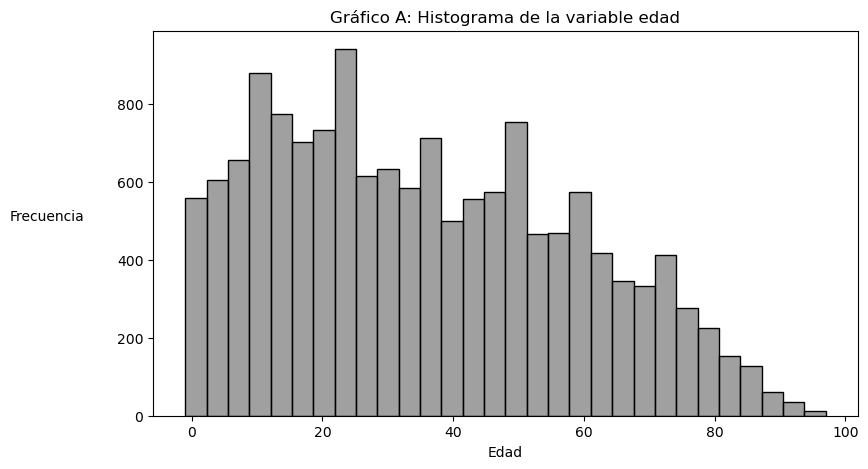

In [32]:
## Parte 1 - Ejercicio 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_04['Años al momento de la encuesta'] = df_04['Años al momento de la encuesta'].replace("Menos de 1 año", 0)
df_04['Años al momento de la encuesta'] = pd.to_numeric(df_04['Años al momento de la encuesta'], errors='coerce')  # Codificamos los datos de edad de 2004, de tipo categorica, a tipo numérico
df_04['edad2'] = df_04['Años al momento de la encuesta'] ** 2

df_24['Años al momento de la encuesta'] = df_24['Años al momento de la encuesta'].replace("Menos de 1 año", 0)
df_24['Años al momento de la encuesta'] = pd.to_numeric(df_24['Años al momento de la encuesta'], errors='coerce')  # Codificamos los datos de edad de 2024, de tipo categorical, a tipo numérico
df_24['edad2'] = df_24['Años al momento de la encuesta'] ** 2

# Concatenamos ambas bases
df = pd.concat([df_04, df_24], ignore_index=True)

# Panel A: Histograma
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Años al momento de la encuesta'].dropna(), bins=30, kde=False, color='grey')
plt.title("Gráfico A: Histograma de la variable edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia", rotation=0, labelpad=50)

sns.kdeplot(ocupados.dropna(), label='Ocupados', color='blue', fill=True, alpha=0.5)
sns.kdeplot(desocupados.dropna(), label='Desocupados', color='red', fill=True, alpha=0.5)

# Panel B: Distribución kernel para ocupados y desocupados
plt.subplot(1, 2, 2)

ocupados = df[df['ESTADO'] == "Ocupado"]['Años al momento de la encuesta'] 
desocupados = df[df['ESTADO'] == "Desocupado"]['Años al momento de la encuesta']

sns.kdeplot(ocupados, label='Ocupados', color='blue', fill=True, alpha=0.5)
sns.kdeplot(desocupados, label='Desocupados', color='red', fill=True, alpha=0.5)

plt.title("Gráfico B: Distribución de densidad por ocupación")
plt.xlabel("Edad")
plt.ylabel("Densidad", rotation=0, labelpad=25)
plt.legend()
plt.savefig("graficos_edad2", bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()



In [33]:
df_04 = df_04.rename(columns={'ch13': 'CH13'})
df_04 = df_04.rename(columns={'ch12': 'CH12'})
df_04 = df_04.rename(columns={'ch14': 'CH14'})
df_24["CH12"]=df_24["CH12"].replace({1: 'Jardín/preescolar',
2: 'Primario',
3: 'EGB',
4: 'Secundario',
5: 'Polimodal',
6: 'Terciario',
7: 'Universitario',
8: 'Posgrado universitario',
9: 'Educación especial (discapacitado)'
})
df_24["CH14"]= df_24['CH14'].replace({
0: 'Ninguno',
1: 'Primero',
2: 'Segundo',
3: 'Tercero',
4: 'Cuarto',
5: 'Quinto',
6: 'Sexto',
7: 'Séptimo',
8: 'Octavo',
9: 'Noveno',
98: 'Educación especial',
99: 'Ns/Nr'

})


In [34]:
#Agrupamos información para ampliar la base de datos final

df_04 = df_04.rename(columns={'deccfr': 'DECCFR'})
df_04 = df_04.rename(columns={'ideccfr': 'IDECCFR'})
df_04 = df_04.rename(columns={'gdeccfr': 'GDECCFR'})
df_04 = df_04.rename(columns={'rdeccfr': 'RDECCFR'})
df_04 = df_04.rename(columns={'pdeccfr': 'PDECCFR'})
df_04 = df_04.rename(columns={'adeccfr': 'ADECCFR'})
df_04 = df_04.rename(columns={'ano4': 'ANO4'})
df_04 = df_04.rename(columns={'pp3f_tot': 'PP3F_TOT'})
df_04 = df_04.rename(columns={'pp3e_tot': 'PP3E_TOT'})
df_04 = df_04.rename(columns={'p21':"P21"})


import numpy as np
df_2 = df_04.filter([
    "Sexos Relevados", "REGION", "ANO4", "Nivel Educativo", "Estado Civil", "Cobertura Médica",
    "Categoría de Inactividad", "Ingreso Per Cápita Familiar", "Años al momento de la encuesta",
    "Sabe leer y escribir", "Tiene Vacaciones Pagas", "Cobra Aguinaldo", "ESTADO",
    "Trabajó en el último año", "Sin Aguinaldo Ni V.P",
    "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "CH12","CH13","CH14","edad2","PP3F_TOT","PP3E_TOT","P21"])

df_2= df_2.replace(' ', np.nan)
df_2= df_2.replace('', np.nan)
df_2= df_2.replace('  ', np.nan)

df_3 = df_24.filter([
    "Sexos Relevados", "REGION", "ANO4", "Nivel Educativo", "Estado Civil", "Cobertura Médica",
    "Categoría de Inactividad", "Ingreso Per Cápita Familiar", "Años al momento de la encuesta",
    "Sabe leer y escribir", "Tiene Vacaciones Pagas", "Cobra Aguinaldo", "ESTADO",
    "Trabajó en el último año", "Sin Aguinaldo Ni V.P",
    "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR","CH12","CH13","CH14","edad2","PP3F_TOT","PP3E_TOT","P21"
])

df_3= df_3.replace(' ', np.nan)
df_3= df_3.replace('', np.nan)
df_3= df_3.replace('  ', np.nan)

df_2["DECCFR"] = df_2["DECCFR"].astype(float)
df_2["IDECCFR"] = df_2["IDECCFR"].astype(float)
df_2["RDECCFR"] = df_2["RDECCFR"].astype(float)
df_2["GDECCFR"] = df_2["GDECCFR"].astype(float)
df_2["PDECCFR"] = df_2["PDECCFR"].astype(float)
df_2["ADECCFR"] = df_2["ADECCFR"].astype(float)

df_10=pd.merge(df_2,df_3, how="outer")
df_10= df_10.replace(0.0, np.nan)

C:\Users\54115\AppData\Local\Temp\ipykernel_10752\1004972215.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2= df_2.replace('  ', np.nan)


In [35]:
#Parte 1, Ejercicio 2

# La función registra los años de educación según hayan o no terminado cada instancia de su trayecto académico.

#Si alguien llega a un nivel de posgrado universitario, habrá tenido para ese entonces 17 años de educación formal.
def anos_educ(CH12, CH13, CH14):
    ano_por_numero= {
        "Primero": 1,
        "Segundo": 2,
        "Tercero": 3,
        "Cuarto": 4,
        "Quinto": 5,
        "Sexto": 6,
        "Séptimo": 7,
        "Octavo": 8,
        "Noveno": 9
    }
    minimo_ano= {
        "Jardín/preescolar": 0,
        "Primario": 0,
        "EGB": 0,
        "Secundario": 6,
        "Polimodal": 6,  
        "Terciario": 12,  
        "Universitario": 12, 
        "Posgrado universitario": 17,
        "Educación especial (discapacitado)": 0
    }

    if CH13 == "Sí":
        return minimo_ano.get(CH12,0) + {
            "Primario": 6,
            "EGB": 9,
            "Secundario": 6,
            "Polimodal": 6,
            "Terciario": 2,
            "Universitario": 3,
            "Posgrado universitario": 3,
            "Jardín/preescolar": 0,
            "Educación especial (discapacitado)": 0
        }.get(CH12,0)

    
    if CH14 in ano_por_numero:
        return minimo_ano.get(CH12, 0) + ano_por_numero[CH14]

df_10["educ"]= df_10.apply(lambda row: anos_educ(row['CH12'], row['CH13'], row['CH14']), axis=1)

In [36]:
# Realizamos la estadística descriptiva, y creamos un DataFrame aparte para una mejor visualización.

descripcion_educ = df_10['educ'].describe()
df_descripcion_educ = descripcion_educ.to_frame().T
df_descripcion_educ.columns = ['Total observaciones', 'Promedio', 'Desvío Estándar', 'Mín', '25%', '50%', '75%', 'Máx']
df_descripcion_educ['Promedio'] = df_descripcion_educ['Promedio'].round(1)
df_descripcion_educ['Desvío Estándar'] = df_descripcion_educ['Desvío Estándar'].round(1)
df_descripcion_educ
## La variable 'educ' muestra los años de educación formal. Los datos de la estadística arrojan un promedio de 8 años, con un desvío estándar de 11,6. El 50% de las observaciones tuvieron 7 años de educación formal.

,Total observaciones,Promedio,Desvío Estándar,Mín,25%,50%,75%,Máx
educ,9360.0,10.1,4.0,0.0,6.0,12.0,13.0,21.0


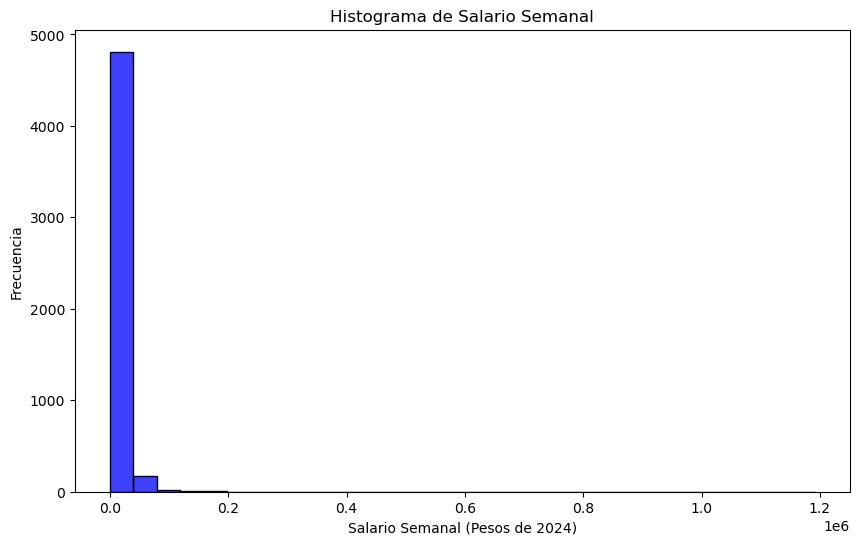

C:\Users\54115\AppData\Local\Temp\ipykernel_10752\502065648.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_10.loc[df_10['ESTADO'] == 'Ocupado', 'salario_semanal'], label="Ocupados", shade=True, color='green')
C:\Users\54115\AppData\Local\Temp\ipykernel_10752\502065648.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_10.loc[df_10['ESTADO'] == 'Desocupado', 'salario_semanal'], label="Desocupados", shade=True, color='red')
C:\Users\54115\AppData\Local\Temp\ipykernel_10752\502065648.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_10.loc[df_10['ESTADO'] == 'Desocupado', 'salario_semanal'], label="Desocupados", shade=True, color='red')


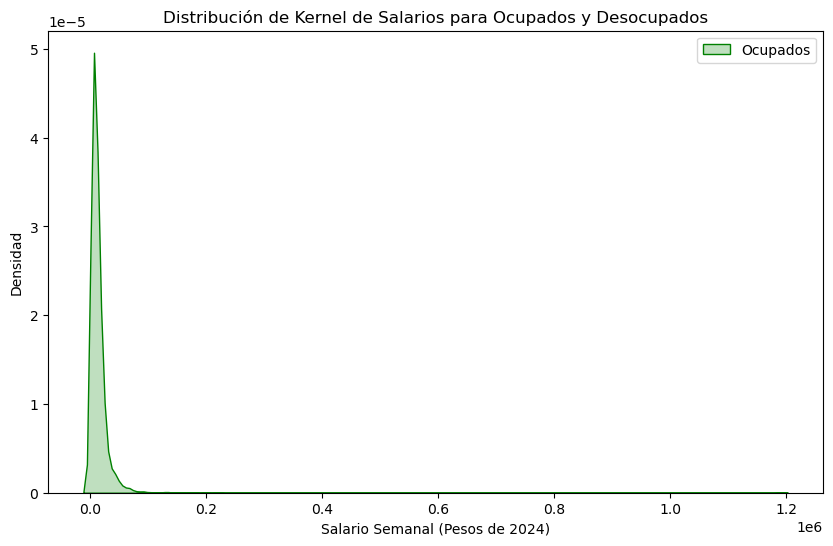

In [37]:
#parte 1, ejercicio 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Divido ingresos habituales (P21) por 40 para obtener el salario semanal
df_10['salario_semanal'] = df_10['P21'] / 40
df_10.loc[df_10["ANO4"] == 2004, "salario_semanal"] *= 882.22
df_10["P21"]= df_10["P21"].replace(-9.0, np.nan)
#No puee haber valores correspondientes a "salarios negativos"
df_10["salario_semanal"] = df_10["salario_semanal"].where(df_10["salario_semanal"] >= 0, np.nan)

# Creo un histograma de salario_semanal (Panel A)
plt.figure(figsize=(10, 6))
sns.histplot(df_10['salario_semanal'].dropna(), kde=False, bins=30, color='blue')
plt.title("Histograma de Salario Semanal")
plt.xlabel("Salario Semanal (Pesos de 2024)")
plt.ylabel("Frecuencia")
plt.show()

# Creo distribuciones de kernel para ocupados y desocupados (Panel B)
plt.figure(figsize=(10, 6))
sns.kdeplot(df_10.loc[df_10['ESTADO'] == 'Ocupado', 'salario_semanal'], label="Ocupados", shade=True, color='green')
sns.kdeplot(df_10.loc[df_10['ESTADO'] == 'Desocupado', 'salario_semanal'], label="Desocupados", shade=True, color='red')
plt.title("Distribución de Kernel de Salarios para Ocupados y Desocupados")
plt.xlabel("Salario Semanal (Pesos de 2024)")
plt.ylabel("Densidad")
plt.legend()
plt.show()



In [56]:
#Parte 1, Ejercicio 4
#Se deben sumar tanto las horas que trabajó en su ocupación principal como en otras ocupaciones.
#En caso de que haya un NaN en ambas categorías, horas_trab debe ser 0. Si hubiera un NaN en PP3F_TOT, solo se tiene en cuenta para sumar a PP3E_TOT
import pandas as pd

# Pasamos las variables de tipo categóricas a numéricas (si es necesario)
df['PP3E_TOT'] = pd.to_numeric(df['PP3E_TOT'], errors='coerce')
df['PP3F_TOT'] = pd.to_numeric(df['PP3F_TOT'], errors='coerce')
# Definimos la variable "horastrab" como la suma entre las horas de la ocupación principal y otras ocupaciones
df['horastrab'] = df['PP3E_TOT'] + df['PP3F_TOT']

def suma_bien(x, y):
    x = 0 if pd.isna(x) else x
    y = 0 if pd.isna(y) else y
    return x + y

df_10['horas_trab'] = df_10.apply(lambda row: suma_bien(row['PP3E_TOT'], row['PP3F_TOT']), axis=1)

#En una semana habil hay 120 horas. Asumiendo a 120 como máximo de horas que una persona puede trabajar  

df_10.loc[df_10['horas_trab'] > 120, "horas_trab"] = np.nan
df_10

,Sexos Relevados,REGION,ANO4,Nivel Educativo,Estado Civil,Cobertura Médica,Categoría de Inactividad,Ingreso Per Cápita Familiar,Años al momento de la encuesta,Sabe leer y escribir,...,CH12,CH13,CH14,edad2,PP3F_TOT,PP3E_TOT,P21,educ,salario_semanal,horas_trab
0,Mujer,Gran Buenos Aires,2004.0,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,NaN,735.714286,59.0,Sí,...,Primario,Sí,NaN,3481.0,NaN,50.0,NaN,6.0,NaN,50.0
1,Mujer,Gran Buenos Aires,2004.0,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,NaN,3416.333333,46.0,Sí,...,Primario,Sí,NaN,2116.0,NaN,18.0,250.0,6.0,5513.875,18.0
2,Mujer,Gran Buenos Aires,2004.0,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,Ama de casa,50.000000,68.0,Sí,...,Primario,Sí,NaN,4624.0,NaN,NaN,NaN,6.0,NaN,0.0
3,Mujer,Gran Buenos Aires,2004.0,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,Ama de casa,200.000000,54.0,Sí,...,Primario,Sí,NaN,2916.0,NaN,NaN,NaN,6.0,NaN,0.0
4,Mujer,Gran Buenos Aires,2004.0,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,Ama de casa,200.000000,61.0,Sí,...,Primario,Sí,NaN,3721.0,NaN,NaN,NaN,6.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,Varón,Gran Buenos Aires,2024.0,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),Ama de casa,46666.670000,45.0,Sí,...,Universitario,No,Primero,2025.0,NaN,NaN,NaN,13.0,NaN,0.0
14694,Varón,Gran Buenos Aires,2024.0,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),Jubilado / Pensionado,359000.000000,91.0,Sí,...,Universitario,No,Cuarto,8281.0,NaN,NaN,NaN,16.0,NaN,0.0
14695,Varón,Gran Buenos Aires,2024.0,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),NaN,NaN,61.0,Sí,...,Universitario,No,Tercero,3721.0,NaN,40.0,535000.0,15.0,13375.000,40.0
14696,Varón,Gran Buenos Aires,2024.0,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),NaN,NaN,68.0,Sí,...,Terciario,No,Tercero,4624.0,NaN,20.0,NaN,15.0,NaN,20.0


In [57]:
#Parte 1,Ejercicio 4
desc_horastrab=df_10["horas_trab"].describe()
df_descripcion_horastrab = desc_horastrab.to_frame().T
df_descripcion_horastrab.columns = ['Total observaciones', 'Promedio', 'Desvío Estándar', 'Mín', '25%', '50%', '75%', 'Máx']
df_descripcion_horastrab


,Total observaciones,Promedio,Desvío Estándar,Mín,25%,50%,75%,Máx
horas_trab,14643.0,15.435157,22.663941,0.0,0.0,0.0,35.0,114.0


In [58]:
#Parte 1, Ejercicio 5

# Base de datos final
df_final = df_10

#Cantidad de observaciones
contar_24 = 2024
contar_ano24 = (df_final["ANO4"] == contar_24).sum()
contar_04 = 2004
contar_ano04 = (df_final["ANO4"] == contar_04).sum()
obs_total = contar_ano24 + contar_ano04

#Cantidad de NaN en la columna "Estado"
nan_2004 = df_final[(df_final["ANO4"] == 2004) & (df_final["ESTADO"].isna())].shape[0]
nan_2024 = df_final[(df_final["ANO4"] == 2024) & (df_final["ESTADO"].isna())].shape[0]
nan_total = nan_2004 + nan_2024

#Número de ocupados
ocupado_04 = df_final[(df_final["ANO4"] == 2004) & (df_final["ESTADO"] == "Ocupado")].shape[0]
ocupado_24 = df_final[(df_final["ANO4"] == 2024) & (df_final["ESTADO"] == "Ocupado")].shape[0]
ocu_total = ocupado_04 + ocupado_24

#Número de desocupados
desocupado_04 = df_final[(df_final["ANO4"] == 2004) & (df_final["ESTADO"] == "Desocupado")].shape[0]
desocupado_24 = df_final[(df_final["ANO4"] == 2024) & (df_final["ESTADO"] == "Desocupado")].shape[0]
desoc_total = desocupado_04 + desocupado_24

#Cantidad de variables limpias y homogeneas
# df_final contiene datos homogeneizados para todas sus variables tanto para 2004 como para 2024
# Por lo tanto, la cantidad de variables limpias y homogeneizadas para ambos años es la misma que la del total de variables en df_final
lim_hom_total = df_final.shape[1]


#Dataframe con los valores de la tabla de resumen
data = [
    [contar_ano04,contar_ano04,obs_total],
    [nan_2004,nan_2024,nan_total],
    [ocupado_04,ocupado_24,ocu_total ],
    [desocupado_04,desocupado_24, desoc_total],
    [lim_hom_total, lim_hom_total, lim_hom_total]
]

columnas = ['2004', '2024', 'Total']
index = ['Cantidad de observaciones', 'Cantidad de observaciones con Nas en la variable "Estado"', 'Cantidad de Ocupados', 
         'Cantidad de Desocupados', 'Cantidad de variables limpias y homogeneizadas']


df_resumen = pd.DataFrame(data, columns=columnas, index=index)
df_resumen



,2004,2024,Total
Cantidad de observaciones,7647,7647,14698
"Cantidad de observaciones con Nas en la variable ""Estado""",0,0,0
Cantidad de Ocupados,3079,3224,6303
Cantidad de Desocupados,528,311,839
Cantidad de variables limpias y homogeneizadas,31,31,31


In [71]:
# Parte 2 - Ejercicio 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_final = df[df['REGION'] == 'Gran Buenos Aires']
variables_interes = ['Años al momento de la encuesta', 'edad2', 'Nivel Educativo', 'salario_semanal', 'horastrab']
df_final = df_final[variables_interes]
matriz_cor = df_final.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_cor, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Edad, Educación, Salario Semanal y Horas Trabajadas (GBA)')
plt.show()
print(matriz_cor)

ValueError: could not convert string to float: 'Secundaria Incompleta'

In [72]:
## PCA - Punto 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Primero que nada filtramos los datos del GBA
df_final = df[df['REGION'] == 1]

# Luego estandarizamos las variables
variables_pca = ['Años al momento de la encuesta', 'edad2', 'Nivel Educativo', 'salario_semanal', 'horastrab']
df_final_clean = df_gba[variables_pca].dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final_clean)

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.

In [75]:
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_scores, columns=['PC1', 'PC2']) # Creamos un dataframe con el PCA aplicado

NameError: name 'df_scaled' is not defined

In [76]:
# En base a ese df, creamos un gráfico de dispersión (scatterplot) con seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], color='blue', alpha=0.6)
plt.title("PCA: Componentes principales 1 y 2. GBA", fontsize=14)
plt.xlabel("Componente Principal n°1", fontsize=11)
plt.ylabel("Componente Principal n°2", fontsize=11)
plt.grid(True)
plt.savefig('grafico_pca_dispersion.jpg', format='jpg', dpi=300)
plt.show()

NameError: name 'df_pca' is not defined

<Figure size 800x600 with 0 Axes>

In [77]:
# PCA - Punto 3

# Los loadings son los ponderadores. Necesitamos saber los de los dos primeros componentes
loadings = pca.components_[:2, :]

# Configuramos el gráfico
plt.figure(figsize=(10, 6))
for i in range(len(variables_pca)):
    plt.arrow(0, 0, loadings[0, i], loadings[1, i], 
              color='red', alpha=0.6, head_width=0.05, head_length=0.1)
    plt.text(loadings[0, i] * 1.1, loadings[1, i] * 1.1, variables_pca[i], color='black', ha='center', va='center') # Graficamos las flechas
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='grey',linewidth=1)
plt.axvline(0, color='grey',linewidth=1)
plt.title("Loadings (ponderadores) de PCA: Primer y Segundo Componente", fontsize=14)
plt.xlabel("Componente Principal n°1", fontsize=11)
plt.ylabel("Componente Principal n°2", fontsize=11)
plt.grid(True)
plt.savefig('grafico_flechas_pca.jpg', format='jpg')
plt.show()

AttributeError: 'PCA' object has no attribute 'components_'

In [ ]:
# PCA - Punto 4

# Primero utilizamos la función de PCA que explica la varianza y hacemos un print
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

In [ ]:
# Luego de esto, realizamos el gráfico
varianza_explicada = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, color='orange') # Utilizamos un gráfico de barras
plt.title('Proporción de Varianza, explicada por cada componente. PCA', fontsize=14)
plt.xlabel('Componentes principales', fontsize=11)
plt.ylabel('Proporción de Varianza Explicada', fontsize=11)
plt.xticks(np.arange(1, len(varianza_explicada) + 1))
plt.ylim(0, 1)
plt.savefig('grafico_barras_pca.png', dpi=300)
plt.show()